**Swarali Paygude**

**Panel A**

**PA22**

**ML Miniproject**

**Song Genre Classification - for Song Recommendations**

**Background :**
We can categorize music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring it on a variety of metrics. 
Here, the data is examined with a  goal to classify songs as belonging to either 'Hip-Hop' or 'Rock'. This will be done without actually listening to the songs, only based on the musical features of the tracks, such as danceability and acousticness. 
This will further help in the song recommendations based on the users' taste in music.

**Dataset used :**
Combination of 2 files :
CSV file - the metadata about the tracks; JSON file - the musical features/metrics of each track (on a scale from -1 to 1)

**Machine learning algorithms used :**
Logistic regression, Decision tree classifier, K-Nearest neighbors classifier

In [52]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [53]:
# load track metadata with genre labels

tracks = pd.read_csv("fma-rock-vs-hiphop.csv")
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,26-11-2008 01:43,26-11-2008 00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,26-11-2008 01:43,26-11-2008 00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,26-11-2008 01:44,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,26-11-2008 01:44,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,26-11-2008 01:45,26-11-2008 00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [54]:
# load track metrics with the features

metrics = pd.read_json("echonest-metrics.json", precise_float=True)
metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [55]:
# Merging relevant columns of tracks and metrics from the common attribute track id

tracks_metrics = pd.merge(metrics, tracks[["track_id", "genre_top"]], on="track_id")
tracks_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [56]:
tracks_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [57]:
# checking for null values
tracks_metrics.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [58]:
# correlation matrix

corr_metrics = tracks_metrics.corr()
corr_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [59]:
tracks_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [60]:
# Defining features 

features = tracks_metrics.drop(["genre_top","track_id"], axis=1)
features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [61]:
# Defining target

target = tracks_metrics["genre_top"]
target.head()

0    Hip-Hop
1    Hip-Hop
2    Hip-Hop
3    Hip-Hop
4       Rock
Name: genre_top, dtype: object

In [62]:
# getting count of the target values
tracks_metrics["genre_top"].value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [63]:
# Scaling the features 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102


In [64]:
# dropping track id as it is not required

tm = tracks_metrics.drop(["track_id"], axis=1)
tm.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [66]:
# Encoding target as it is categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
tm['genre_top'] = labelencoder.fit_transform(tm['genre_top'])
tm.head()


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,1


In [69]:
print("\n Original target classes :\n\n",tracks_metrics['genre_top'])
print("\n Encoded target classes :\n\n",tm['genre_top'])


 Original target classes :

 0       Hip-Hop
1       Hip-Hop
2       Hip-Hop
3       Hip-Hop
4          Rock
         ...   
4797    Hip-Hop
4798    Hip-Hop
4799    Hip-Hop
4800    Hip-Hop
4801    Hip-Hop
Name: genre_top, Length: 4802, dtype: object

 Encoded target classes :

 0       0
1       0
2       0
3       0
4       1
       ..
4797    0
4798    0
4799    0
4800    0
4801    0
Name: genre_top, Length: 4802, dtype: int32


In [17]:
# genre_top column now has all int values
tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 9 columns):
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null int32
dtypes: float64(8), int32(1)
memory usage: 356.4 KB


In [70]:
# Defining X and y for train and test sets

X = tm.drop('genre_top',axis=1)
y = tm['genre_top']

In [71]:
features_label = tm.columns[:8]
features_label

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [72]:
target_label = tm.columns[8]
target_label

'genre_top'

In [78]:
# Splitting the dataset into the Training set and Test set in ratio 7:3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [79]:
# Feature Scaling

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


In [80]:
# Using principal component analysis for dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(n_components = None )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.243657
1  0.184104
2  0.135129
3  0.128064
4  0.111439
5  0.080925
6  0.069213
7  0.047468


Text(0, 0.5, 'Explained variance ')

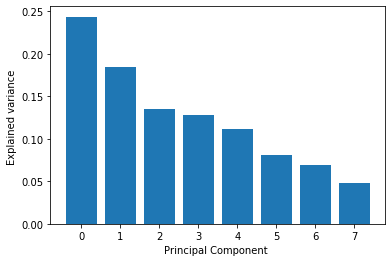

In [81]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(8), explained_variance)
ax.set_xlabel('Principal Component ')
ax.set_ylabel('Explained variance ')

Text(0, 0.5, 'Cumulative explained variance ')

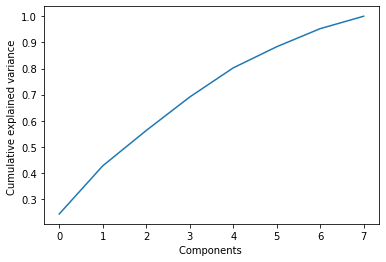

In [82]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(explained_variance)

# screeplot displays the variance explained by each principal component

fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.set_xlabel('Components ')
ax.set_ylabel('Cumulative explained variance ')

In [83]:
# 6 components chosen
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(features)
pca_projection = pca.transform(features)

In [ ]:
# Machine Learning models

In [84]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# making a classifier object
classifier = LogisticRegression()

# training the classifier
classifier.fit(X_train, y_train)

# predicting the classes of test set
y_pred_lr = classifier.predict(X_test)

# result of predicted classes
res_lr = pd.DataFrame(y_pred_lr,columns = ['genre'])
print("Logistic regression :")
res_lr.sample(10)

Logistic regression :


,genre
252,0
353,1
1377,1
648,1
578,1
365,1
976,1
762,1
1182,1
830,0


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

# getting the accuracy of this model

acc_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy of Logistic Regression : ',acc_lr)

Accuracy of Logistic Regression :  0.8917418459403192


In [86]:
# getting confusion matrix

cm_lr = confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[ 156  113]
 [  43 1129]]


In [87]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred_dt = classifier.predict(X_test)

res_dt = pd.DataFrame(y_pred_dt,columns = ['genre'])
print("DT classifier :")
res_dt.sample(10)

DT classifier :


,genre
1351,1
593,0
1280,1
1318,0
505,1
1198,1
1387,1
897,1
1216,1
808,1


In [88]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy of Decision Tree Classifier : ',acc_dt)

Accuracy of Decision Tree Classifier :  0.8591256072172103


In [89]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(cm_dt)

[[ 183   86]
 [ 117 1055]]


In [90]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

res_knn = pd.DataFrame(y_pred_knn,columns = ['genre'])
print("KNN classifier :")
res_knn.sample(10)

KNN classifier :


,genre
372,1
75,1
1213,1
626,0
477,0
969,0
1084,1
959,0
143,1
551,0


In [91]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN : ',acc_knn)

Accuracy of KNN :  0.9167244968771686


In [92]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
print(cm_knn)

[[ 188   81]
 [  39 1133]]


In [93]:
print('Accuracy of Logistic Regression : ',acc_lr)
print('Accuracy of Decision Tree Classifier : ',acc_dt)
print('Accuracy of KNN : ',acc_knn)

Accuracy of Logistic Regression :  0.8917418459403192
Accuracy of Decision Tree Classifier :  0.8591256072172103
Accuracy of KNN :  0.9167244968771686


Among these 3 algorithms, KNN gives the highest accuracy of 91.67%

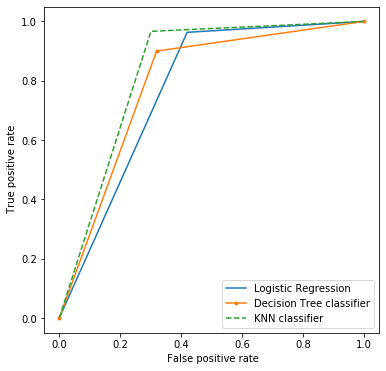

In [94]:
# ROC (Receiver Operating Characteristic) for visualizing the accuracy of models

from sklearn.metrics import roc_curve

lr_fpr, lr_tpr,lr_threshold = roc_curve(y_test, y_pred_lr)
dt_fpr, dt_tpr,dt_threshold = roc_curve(y_test, y_pred_dt)
knn_fpr, knn_tpr,knn_threshold = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(6,6))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label = 'Logistic Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label = "Decision Tree classifier")
plt.plot(knn_fpr, knn_tpr, linestyle='--', label = "KNN classifier")

plt.xlabel(' False positive rate')
plt.ylabel(' True positive rate')
plt.legend()
plt.show()

In [95]:
# Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [96]:
# scaling so that all features become comparable
scaler = StandardScaler()
tm_scaled = scaler.fit_transform(tm)

# normalising sothat data follows Gaussian distribution
tm_normalized = normalize(tm_scaled)

tm_normalized = pd.DataFrame(tm_normalized)

In [97]:
tm_scaled

array([[-0.19121034,  1.30442004,  0.03831594, ...,  1.15397908,
         0.46228696, -2.06807231],
       [-0.30603598,  0.50188641,  0.78817624, ...,  0.00791367,
        -0.69081137, -2.06807231],
       [-1.20481276,  1.68413943,  0.31285194, ..., -0.77731688,
         0.63107745, -2.06807231],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ..., -0.93541008,
        -0.07941825, -2.06807231],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.31301348,
         0.47513794, -2.06807231],
       [-0.90611434,  1.10148973,  0.56322452, ..., -1.43669053,
         0.76217464, -2.06807231]])

In [98]:
tm_normalized

,0,1,2,3,4,5,6,7,8
0,-0.059897,0.408609,0.012002,-0.493836,-0.021537,0.116853,0.361483,0.144811,-0.647823
1,-0.080199,0.131523,0.206547,-0.419241,-0.142942,0.641032,0.002074,-0.181032,-0.541953
2,-0.324735,0.453929,0.084324,-0.432026,0.331478,0.036422,-0.209512,0.170095,-0.557411
3,-0.022015,0.097201,-0.061681,-0.361213,-0.141251,0.670457,-0.084812,0.384420,-0.480990
4,0.428790,-0.310451,0.457640,0.308586,-0.139420,-0.114670,-0.337565,-0.495357,0.152263
...,...,...,...,...,...,...,...,...,...
4797,-0.034467,0.231151,0.155687,-0.271947,0.764948,0.304787,-0.152444,0.151920,-0.350468
4798,-0.349769,0.293909,0.126310,-0.478161,-0.111947,0.282320,-0.266660,-0.060011,-0.616232
4799,-0.268954,0.244467,0.027557,-0.333355,0.708596,0.176952,-0.194316,-0.016498,-0.429608
4800,-0.319271,-0.006318,0.160149,-0.449939,-0.155673,0.395206,0.368148,0.133221,-0.579854


In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
tm_principal = pca.fit_transform(tm_normalized)
tm_principal = pd.DataFrame(tm_principal)
tm_principal.columns = ['P1','P2']

In [43]:
tm_principal.head()

,P1,P2
0,0.833120,-0.209623
1,0.608502,-0.268975
2,0.903388,-0.308127
3,0.846672,-0.052680
4,-0.638299,0.178777


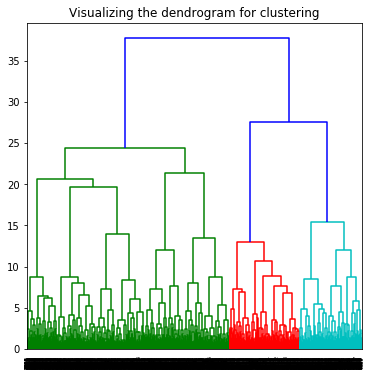

In [44]:
plt.figure(figsize=(6,6))
plt.title('Visualizing the dendrogram for clustering')
Dendogram = shc.dendrogram((shc.linkage(tm_normalized, method='ward')))

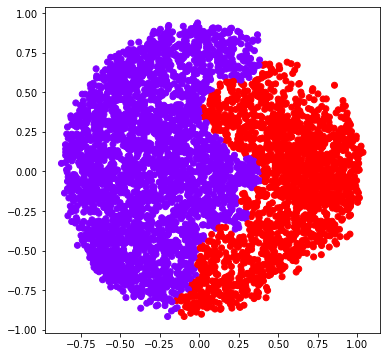

In [45]:
ac2 = AgglomerativeClustering(n_clusters=2)

plt.figure(figsize=(6,6))
plt.scatter(tm_principal['P1'], tm_principal['P2'], c=ac2.fit_predict(tm_principal), cmap = 'rainbow')

plt.show()

In [ ]:
# Ensemble techniques

In [46]:
# Boosting method
# Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50)
model = abc.fit(X_train,y_train)

y_pred_ab = model.predict(X_test)
y_pred_ab

array([0, 1, 1, ..., 1, 0, 1])

In [47]:
acc_ab = accuracy_score(y_test, y_pred_ab)
acc_ab

0.8882720333102012

In [51]:
# Bagging method
# Voting Classifier

from sklearn.ensemble import VotingClassifier

estimators = []
model1 = KNeighborsClassifier()
estimators.append(('KNN',model1))

model2 = DecisionTreeClassifier()
estimators.append(('DT',model2))

model3 = LogisticRegression()
estimators.append(('LR',model3))

ensemble = VotingClassifier(estimators)
ens = ensemble.fit(X_train,y_train)
y_ens = ens.predict(X_test)

acc_ens = accuracy_score(y_test,y_ens)
acc_ens

0.9083969465648855